In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("dataset/telco_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [5]:
df['Churn'].value_counts()['Yes']/(df['Churn'].value_counts()['Yes']  + df['Churn'].value_counts()['No'])

np.float64(0.2653698707936959)

### Imbalanced Dataset

- 21 Features

- Only 26.5% have churned so classification task requires data processing

## Data Analysis

* ###  Data regarding demography

In [6]:
demography_columns = list(df.columns[1:5])

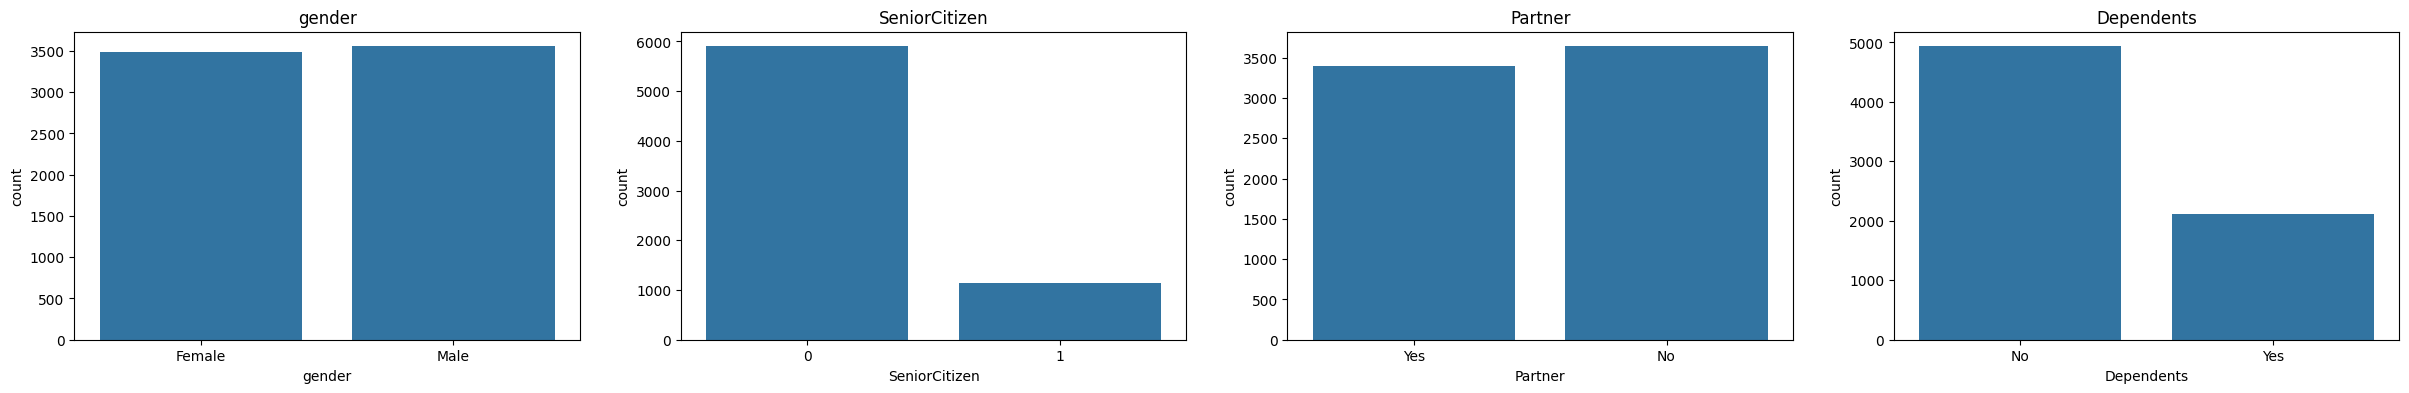

In [7]:
num_demography_features = len(demography_columns)
plt.figure(figsize=(30,4))
for i, demography_column in enumerate(demography_columns):
    ax = plt.subplot(1, num_demography_features, i+1)
    sns.countplot(x=demography_column, data=df)
    ax.set_title(demography_column)

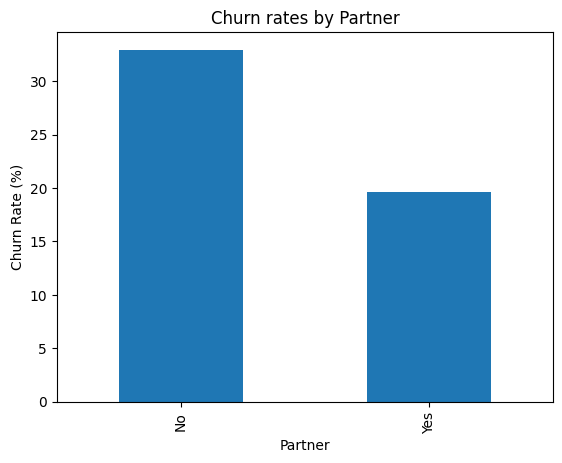

In [8]:
dem_col_name = "Partner"
churn_rates_dem = (df.groupby(f"{dem_col_name}")["Churn"].apply(lambda x: (x=="Yes").mean())* 100)
churn_rates_dem.plot(kind="bar")
plt.title(f"Churn rates by {dem_col_name}")
plt.ylabel("Churn Rate (%)")
plt.show()

### Demography Conclusions:
* Gender distribution and partner statusequal
* Most data are not senior citizens and dont have a dependent.

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

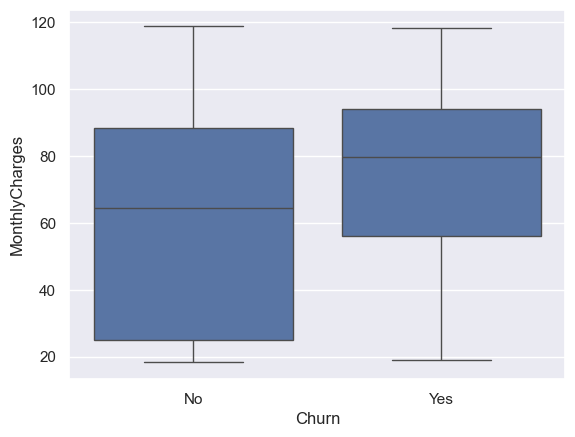

In [9]:
sns.set_theme(style="darkgrid")
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)

In [10]:
# Changing total charges from object to number

df["TotalCharges"] = pd.to_numeric(df.TotalCharges, errors="coerce") #invalid will be nan


In [11]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [12]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
df[np.isnan(df["TotalCharges"])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [14]:
(df["tenure"] == 0).sum()

np.int64(11)

In [15]:
print(df[np.isnan(df["TotalCharges"])]["customerID"], df[df["tenure"]==0]["customerID"])


488     4472-LVYGI
753     3115-CZMZD
936     5709-LVOEQ
1082    4367-NUYAO
1340    1371-DWPAZ
3331    7644-OMVMY
3826    3213-VVOLG
4380    2520-SGTTA
5218    2923-ARZLG
6670    4075-WKNIU
6754    2775-SEFEE
Name: customerID, dtype: object 488     4472-LVYGI
753     3115-CZMZD
936     5709-LVOEQ
1082    4367-NUYAO
1340    1371-DWPAZ
3331    7644-OMVMY
3826    3213-VVOLG
4380    2520-SGTTA
5218    2923-ARZLG
6670    4075-WKNIU
6754    2775-SEFEE
Name: customerID, dtype: object


The customers with 0 tenure might likely have no total charges yet, which is a accurate reflection of the data, so replacing them with 0 rather than dropping them

In [16]:
df.loc[df.tenure == 0, "TotalCharges"] = 0

In [17]:
df = df.dropna(subset=["TotalCharges"])

In [18]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

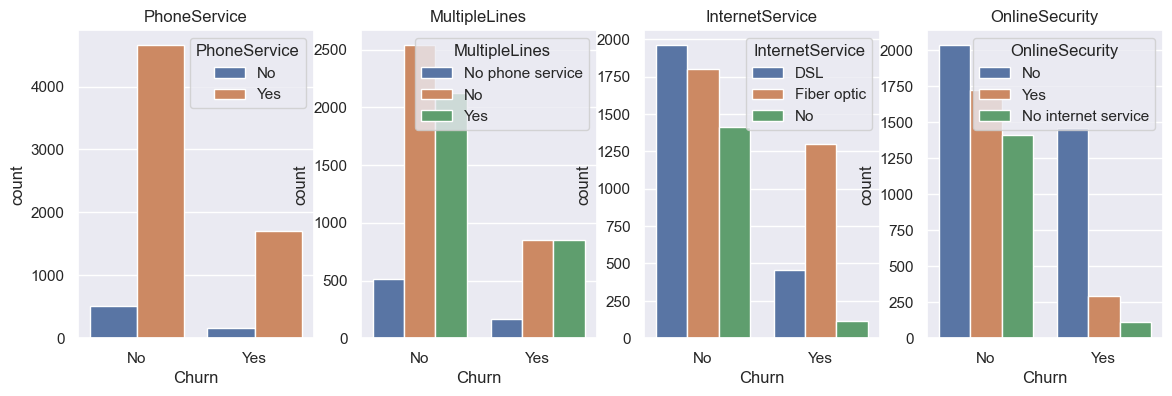

In [19]:
cols = list(df.columns[6:10])
plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x ="Churn", hue = str(col), data = df)
    ax.set_title(f"{col}")

In [20]:
categorical_variables = df.drop(['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure'],axis=1)
categorical_variables.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


We already have many labels so instead of creating one hot encoding, implementing label encoding 

In [21]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df_categorical = categorical_variables.apply(label_encoder.fit_transform)
df_categorical.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [22]:
total_features = pd.merge(df[['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure']], df_categorical, left_index=True, right_index=True)
total_features.head()

,customerID,TotalCharges,MonthlyCharges,SeniorCitizen,tenure,gender,Partner,Dependents,PhoneService,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,29.85,29.85,0,1,0,1,0,0,1,...,0,2,0,0,0,0,0,1,2,0
1,5575-GNVDE,1889.50,56.95,0,34,1,0,0,1,0,...,2,0,2,0,0,0,1,0,3,0
2,3668-QPYBK,108.15,53.85,0,2,1,0,0,1,0,...,2,2,0,0,0,0,0,1,3,1
3,7795-CFOCW,1840.75,42.30,0,45,1,0,0,0,1,...,2,0,2,2,0,0,1,0,0,0
4,9237-HQITU,151.65,70.70,0,2,0,0,0,1,0,...,0,0,0,0,0,0,0,1,2,1


### Random oversampling for the imbalance issue

In [23]:
from sklearn.model_selection import train_test_split

total_df = total_features.dropna()
total_df = total_df.drop(["customerID"], axis = 1)

In [24]:
total_df

,TotalCharges,MonthlyCharges,SeniorCitizen,tenure,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,29.85,29.85,0,1,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1889.50,56.95,0,34,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,108.15,53.85,0,2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1840.75,42.30,0,45,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,151.65,70.70,0,2,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1990.50,84.80,0,24,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,7362.90,103.20,0,72,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,346.45,29.60,0,11,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,306.60,74.40,1,4,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


In [25]:
X = total_df.drop(['Churn'],axis=1)
y = total_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### SMOTE
[Documentation](https://imbalanced-learn.org/stable/references/index.html)

[SMOTE](https://arxiv.org/pdf/1106.1813)

In [26]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote

In [27]:
y_train.value_counts()

Churn
0    4138
1    4138
Name: count, dtype: int64

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=46)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=46)

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier 
from xgboost import XGBClassifier

In [30]:
models=[
    #Ensemble
    AdaBoostClassifier(),
    BaggingClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    
    #Linear Models
    LogisticRegressionCV(),
    RidgeClassifierCV(),
    
    #Nearest Neighbour
    KNeighborsClassifier(),
    
    #XGBoost
    XGBClassifier()
]

metrics_cols = ['model_name','test_accuracy','test_precision','test_recall','test_f1']

model_name=[]
test_acuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]

In [111]:
scoring = ['accuracy','precision', 'recall', 'f1']

for model in models:
    cv_results = model_selection.cross_validate(model, X, y, cv=5, 
                                                scoring=scoring, return_train_score=True)
    model_name.append(model.__class__.__name__)
    test_acuracy.append(round(cv_results['test_accuracy'].mean(),3)*100)
    test_precision.append(round(cv_results['test_precision'].mean(),3)*100)
    test_recall.append(round(cv_results['test_recall'].mean(),3)*100)
    test_f1.append(round(cv_results['test_f1'].mean(),3)*100)

metrics_data = [model_name, test_acuracy, test_precision, test_recall, test_f1]
m = {n:m for n,m in zip(metrics_cols,metrics_data)}
model_metrics = pd.DataFrame(m)
model_metrics = model_metrics.sort_values('test_accuracy', ascending=False)
metrics_styled = model_metrics.style.background_gradient(subset=['test_accuracy', 'test_f1'], cmap='summer')
metrics_styled

/Users/aprab/Documents/Apps/Python/Customer Churn ML/churn_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aprab/Documents/Apps/Python/Customer Churn ML/churn_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver op

,model_name,test_accuracy,test_precision,test_recall,test_f1
2,GradientBoostingClassifier,80.500000,67.200000,51.800000,58.500000
10,GradientBoostingClassifier,80.400000,67.100000,51.800000,58.400000
4,LogisticRegressionCV,80.300000,65.500000,54.400000,59.400000
12,LogisticRegressionCV,80.300000,65.500000,54.400000,59.400000
0,AdaBoostClassifier,80.200000,65.400000,54.100000,59.200000
8,AdaBoostClassifier,80.200000,65.400000,54.100000,59.200000
5,RidgeClassifierCV,80.000000,66.100000,50.500000,57.200000
13,RidgeClassifierCV,80.000000,66.100000,50.500000,57.200000
3,RandomForestClassifier,79.100000,64.000000,49.000000,55.500000
11,RandomForestClassifier,79.100000,64.100000,48.400000,55.100000


In [31]:
final_model=RandomForestClassifier()
final_model.fit(X_train, y_train)
train_pred = final_model.predict(X_train)
test_pred = final_model.predict(X_test)

final_model.score(X_test, y_test)

0.7735982966643009

Feature Importance Gain


<Axes: >

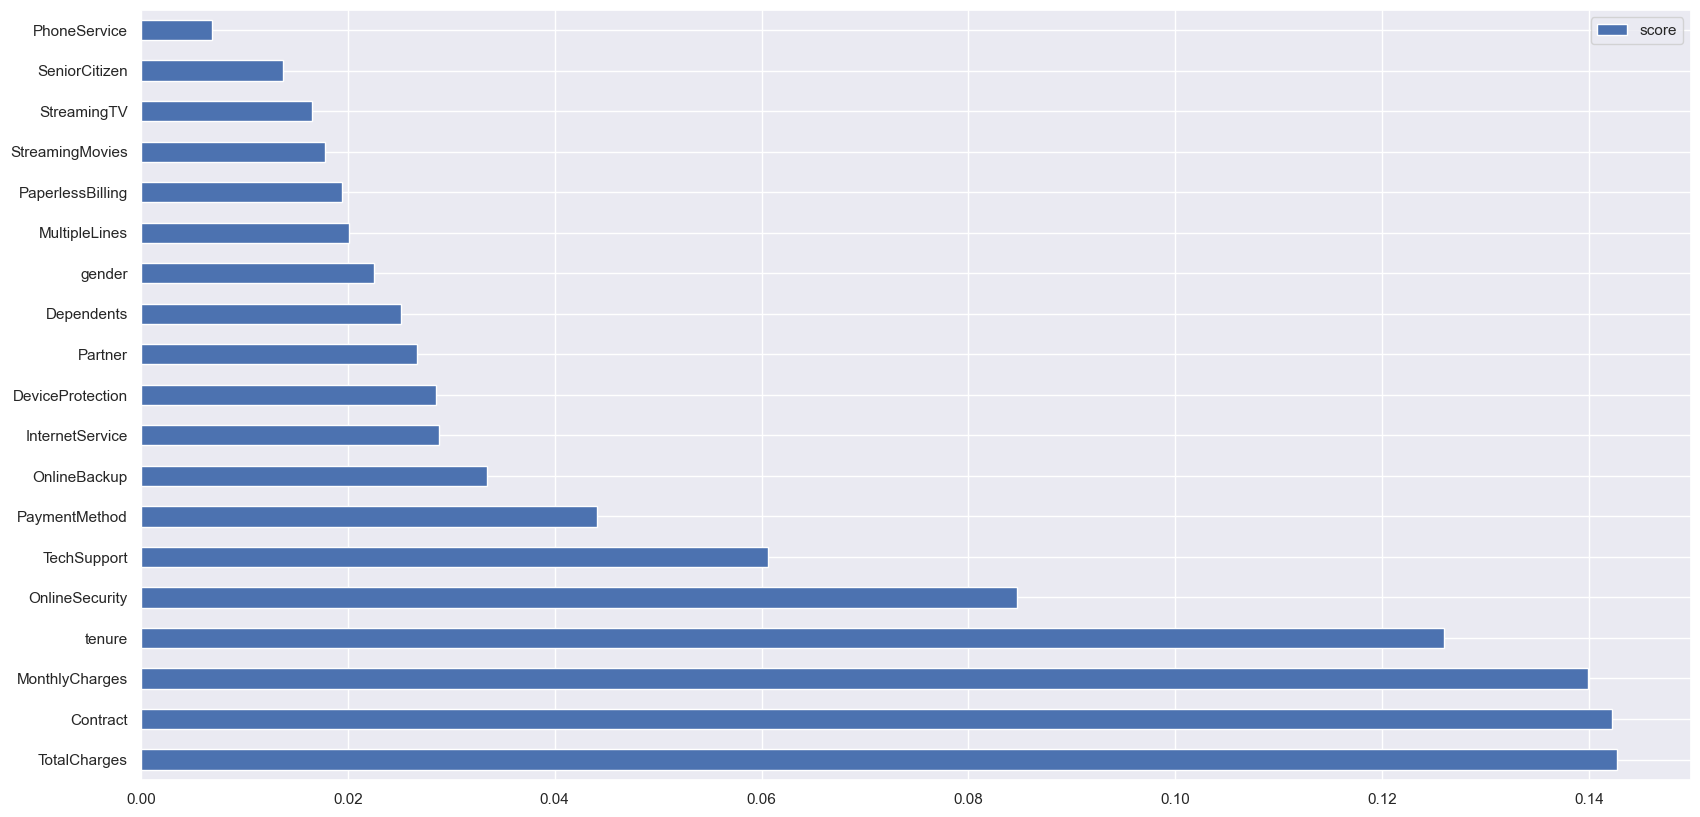

In [32]:
print("Feature Importance Gain")
feature_important = final_model.feature_importances_
values = list(feature_important)
keys = list(X.columns)
# keys = list(feature_important.keys())
# values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(20, columns="score").plot(kind='barh', figsize = (20,10)) 

Lets check if only choosing prominent features work

In [33]:
cols_to_drop = ["PhoneService"]
X.drop(cols_to_drop, axis = 1, inplace=True)

In [34]:
X_train.drop(cols_to_drop, axis = 1, inplace = True)
X_test.drop(cols_to_drop, axis = 1, inplace = True)

In [144]:
X

,TotalCharges,MonthlyCharges,SeniorCitizen,tenure,gender,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,29.85,29.85,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2
1,1889.50,56.95,0,34,1,0,0,0,0,2,0,2,0,0,0,1,0,3
2,108.15,53.85,0,2,1,0,0,0,0,2,2,0,0,0,0,0,1,3
3,1840.75,42.30,0,45,1,0,0,1,0,2,0,2,2,0,0,1,0,0
4,151.65,70.70,0,2,0,0,0,0,1,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1990.50,84.80,0,24,1,1,1,2,0,2,0,2,2,2,2,1,1,3
7039,7362.90,103.20,0,72,0,1,1,2,1,0,2,2,0,2,2,1,1,1
7040,346.45,29.60,0,11,0,1,1,1,0,2,0,0,0,0,0,0,1,2
7041,306.60,74.40,1,4,1,1,0,2,1,0,0,0,0,0,0,0,1,3


In [146]:
X_test

,TotalCharges,MonthlyCharges,SeniorCitizen,tenure,gender,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
185,24.80,24.80,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2
2715,996.45,25.25,0,41,1,0,0,2,2,1,1,1,1,1,1,0,1,0
3825,1031.70,19.35,0,52,0,1,1,0,2,1,1,1,1,1,1,2,0,3
1807,76.35,76.35,0,1,0,0,0,0,1,0,0,2,0,0,0,0,0,2
132,3260.10,50.55,0,67,1,0,0,0,0,0,0,0,2,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,4378.80,68.30,0,64,0,1,0,0,0,0,2,2,2,0,2,2,1,3
315,5686.40,110.05,0,51,1,1,1,2,1,2,2,0,2,2,2,1,0,1
2439,329.75,19.90,0,17,1,1,1,0,2,1,1,1,1,1,1,1,0,0
5002,2960.10,43.95,0,69,0,1,1,1,0,2,0,2,0,0,2,2,1,1


Usint Neural Networks

In [35]:
import torch
from torch import nn

In [36]:
X_tensors = X.to_numpy()

In [37]:
y_tensors = y.to_numpy()

In [51]:
X_test_np = X_test.to_numpy()
X_train_np = X_train.to_numpy()

y_test_np = y_test.to_numpy()
y_train_np = y_train.to_numpy()

In [ ]:
X_test_tensor = np.array(X_test_np, dtype=np.float32)
X_train_tensor = np.array(X_train_np, dtype=np.float32)

y_test_tensor = np.array(y_test_np, dtype=torch.float32)
y_train_tensor = np.array(y_train_np, dtype=torch.float32)

In [ ]:
X_tensors = np.array(X_tensors, dtype=np.float32)
y_tensors = np.array(y_tensors, dtype = np.float32)

In [39]:
X = torch.from_numpy(X_tensors).type(torch.float32)
y = torch.from_numpy(y_tensors).type(torch.float32)

In [57]:
X_test = torch.from_numpy(X_test_tensor).type(torch.float32)
X_train= torch.from_numpy(X_train_tensor).type(torch.float32)

y_test = torch.from_numpy(y_test_tensor).type(torch.float32)
y_train = torch.from_numpy(y_train_tensor).type(torch.float32)

In [43]:
class ChurnModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=18, out_features = 24)
        self.layer_2 = nn.Linear(in_features=24, out_features=1)

    def forward(self, x):
        return self.layer_2(self.layer_1(x))

In [44]:
device = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'

model = ChurnModel().to(device)
print(device)

mps


In [45]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.1)

In [48]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() #
    acc = (correct / len(y_pred)) * 100 
    return acc

Logits -> Probability -> Prediction labels

In [ ]:
torch.manual_seed (42)

epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


for epoch in range(epochs):

    model.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device 
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls
  
    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train) 
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train) 
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred) 

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")